# Name: Niranjan Ketkar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def calc_Y(x, w, b):
    #y = x.w + b
    return x.dot(w) + b

In [3]:
def calc_error(y, t):
    #print y, t
    return np.sum((y-t)**2)

In [4]:
def try_different_alpha(w_start, b_start, training_x, training_y, num_of_iterations = 10000):
    alpha_start = 10**-8
    error_arr = []
    alpha_values = []
    alpha_arr = []
    iteration_arr = []
    iteration_arr_alpha = []
    error_arr_alpha = []
    #generate different values of alpha in range of alpha_start and alpha_end
    #which are pseudo-uniformly distributed
    for i in range(6):
        alpha_start*=10
        for j in range(10):
            alpha_values.append(alpha_start + alpha_start*j)
        
    #print alpha_values, len(alpha_values)

    for alpha in alpha_values:
        print "trying for alpha value of:", alpha
        error = 10**10
        w = w_start
        b = b_start
        for iteration in range(num_of_iterations):
            mse_error = 0.0
            for i, training in enumerate(training_x):
                training = np.expand_dims(training, axis = 0)
                y_pred = calc_Y(training, w, b)
                
                #Lets calculate error
                t = np.expand_dims(training_y[i], axis = 0)
                error = calc_error(y_pred, t)
                mse_error+=error
                
                #Lets update w and b based on error
                w = w - 2*alpha*training.T.dot(y_pred - t)
                b = b - 2*alpha*(y_pred - t)

            #if iteration%1000==0:
            #    print w, b, error
            #plotting graph for all values of iteration will take lot of memory
            #so we will save values after every few iterations
            if alpha == 0.01 and iteration%10 == 0:
                error_arr_alpha.append(mse_error/len(training_x))
                iteration_arr_alpha.append(iteration)
            if iteration%100 == 0:
                error_arr.append(mse_error/len(training_x))
                alpha_arr.append(alpha)
                iteration_arr.append(iteration)
    
    return iteration_arr, alpha_arr, error_arr, error_arr_alpha, iteration_arr_alpha

In [5]:
#11x3 matricx where w is 1x3
training_x = np.array([[1, 1, -1], [1, 2, -1], [2, -1, 1], [2, 0, 1], [1, -2, 1], [0, 0, 1], \
    [-1, 2, 1], [-2, 1, 1], [-1, -1, -1], [-2, -2, -1], [-2, -1, -1]])
#11x2 matrix where each output Yi = 1x2
training_y = np.array([[-1, -1], [-1, -1], [-1, 1], [-1, 1], [-1, 1], [-1, 1], [1, -1],\
     [1, -1], [1, 1], [1, 1], [1, 1]])
#print training_x, training_y
#Now w is 3x2 matrix and weight is initially zero
w = np.zeros((training_x.shape[1], training_y.shape[1]))
#print w
#bias is intially zero too
b = np.zeros(training_y.shape[1])

In [6]:
"""
we are calling the following function to try different values of alpha and then
plotting the graph of alpha vs error, we are taking 
"""
iteration_arr, alpha_arr, error_arr,error_arr_alpha, iteration_arr_alpha = try_different_alpha(w, b, training_x, training_y, 10000)

trying for alpha value of: 1e-07
trying for alpha value of: 2e-07
trying for alpha value of: 3e-07
trying for alpha value of: 4e-07
trying for alpha value of: 5e-07
trying for alpha value of: 6e-07
trying for alpha value of: 7e-07
trying for alpha value of: 8e-07
trying for alpha value of: 9e-07
trying for alpha value of: 1e-06
trying for alpha value of: 1e-06
trying for alpha value of: 2e-06
trying for alpha value of: 3e-06
trying for alpha value of: 4e-06
trying for alpha value of: 5e-06
trying for alpha value of: 6e-06
trying for alpha value of: 7e-06
trying for alpha value of: 8e-06
trying for alpha value of: 9e-06
trying for alpha value of: 1e-05
trying for alpha value of: 1e-05
trying for alpha value of: 2e-05
trying for alpha value of: 3e-05
trying for alpha value of: 4e-05
trying for alpha value of: 5e-05
trying for alpha value of: 6e-05
trying for alpha value of: 7e-05
trying for alpha value of: 8e-05
trying for alpha value of: 9e-05
trying for alpha value of: 0.0001
trying fo

Error reduced to: 1.02827059581
Error reduced to: 0.354690805912
Error reduced to: 0.352466514307
Error reduced to: 0.352696835757
Error reduced to: 0.355701957817
Error reduced to: 0.387934733857


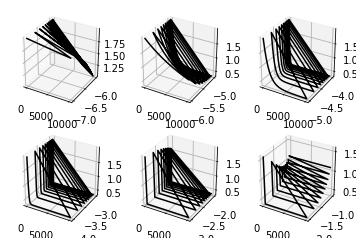

In [7]:
#Lets plot the graph for all errors for respective alphas
#plotting in single graph will be horrible, so we are 
#plotting different ranges of alpha in different subplots

fig = plt.figure()
#plot for very small values of alpha
ax = fig.add_subplot(231, projection='3d')
ax.plot(np.array(iteration_arr)[:1000], np.log10(np.array(alpha_arr))[:1000],np.array(error_arr)[:1000], color = 'black')
print "Error reduced to:",min(error_arr[:1000])

ax = fig.add_subplot(232, projection='3d')
ax.plot(np.array(iteration_arr)[1000:2000], np.log10(np.array(alpha_arr))[1000:2000],np.array(error_arr)[1000:2000], color = 'black')
print "Error reduced to:",min(error_arr[1000:2000])

ax = fig.add_subplot(233, projection='3d')
ax.plot(np.array(iteration_arr)[2000:3000], np.log10(np.array(alpha_arr))[2000:3000],np.array(error_arr)[2000:3000], color = 'black')
print "Error reduced to:",min(error_arr[2000:3000])

#optimal values of alpha
ax = fig.add_subplot(234, projection='3d')
ax.plot(np.array(iteration_arr)[3000:4000], np.log10(np.array(alpha_arr))[3000:4000],np.array(error_arr)[3000:4000], color = 'black')
print "Error reduced to:",min(error_arr[3000:4000])

ax = fig.add_subplot(235, projection='3d')
ax.plot(np.array(iteration_arr)[4000:5000], np.log10(np.array(alpha_arr))[4000:5000],np.array(error_arr)[4000:5000], color = 'black')
print "Error reduced to:", min(error_arr[4000:5000])

#large values of alpha
ax = fig.add_subplot(236, projection='3d')
ax.plot(np.array(iteration_arr)[5000:6000], np.log10(np.array(alpha_arr))[5000:6000],np.array(error_arr)[5000:6000], color = 'black')
print "Error reduced to:",min(error_arr[5000:6000])
plt.show()


Graph Explanation:
X axis: 0 to 10k ... no of iterations
Y axis: 10e-7 to 10e-1 ...different values of alpha in log scale
Z axis: mse

It is clear from the graph that for small values of alpha error has not reduced to its fullest
For values of alpha in range of 0.00001 to 0.001, it is giving very good results.
For those values error has decreased upto range of 0.35

mse error is: 1.12294908849
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.10953044821
mse error is: 1.1095

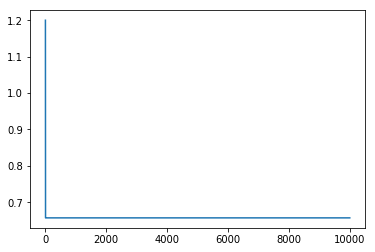

In [9]:
#Now lets try gradually decreasing the value of alpha
#we will first try without reducing alpha and then compare it with
#our technique

#since we are gonna decrease the value, we will start with little bit larger
#value of alpha = 0.1


alpha = 0.1
w = np.zeros((training_x.shape[1], training_y.shape[1]))
b = np.zeros(training_y.shape[1])
mse_arr = []
error_arr = []
error = 10**10
for iteration in range(10000):
    mse_error = 0.0
    for i, training in enumerate(training_x):
        training = np.expand_dims(training, axis = 0)
        y_pred = calc_Y(training, w, b)

        #Lets calculate error
        t = np.expand_dims(training_y[i], axis = 0)
        error = calc_error(y_pred, t)
        mse_error += error
        #Lets update w and b based on error
        w = w - 2*alpha*training.T.dot(y_pred - t)
        b = b - 2*alpha*(y_pred - t)
    error_arr.append(error)
    mse_arr.append(mse_error/len(training_x))
    if iteration%100 == 0:
        print "mse error is:", mse_error/len(training_x)
divide_alpha_fig1 = plt.figure()
sb_divide = divide_alpha_fig1.add_subplot(111)
sb_divide.plot(range(10000), error_arr)
plt.show()

mse error is: 1.12294908849
mse error is: 0.975824612026
mse error is: 0.876520763071
mse error is: 0.798808514897
mse error is: 0.735840277371
mse error is: 0.683773209823
mse error is: 0.640200615135
mse error is: 0.603442772187
mse error is: 0.572238116202
mse error is: 0.545600840656
mse error is: 0.522745553651
mse error is: 0.503040326091
mse error is: 0.485973550926
mse error is: 0.471128915891
mse error is: 0.458165952836
mse error is: 0.446804767989
mse error is: 0.436814017702
mse error is: 0.42800142781
mse error is: 0.420206307522
mse error is: 0.413293624749
mse error is: 0.407149302474
mse error is: 0.401676470084
mse error is: 0.39679246261
mse error is: 0.392426407135
mse error is: 0.388517271702
mse error is: 0.385012279942
mse error is: 0.381865616137
mse error is: 0.379037362003
mse error is: 0.376492619229
mse error is: 0.374200781656
mse error is: 0.372134928573
mse error is: 0.370271316526
mse error is: 0.368588951619
mse error is: 0.367069227891
mse error is: 0.3

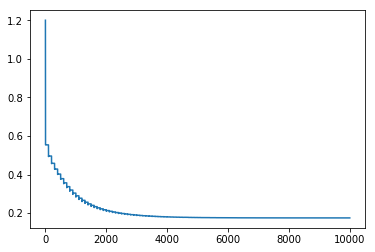

In [11]:
#Our first technique will be dividing alpha after every few iterations
# we will divide alpha by 1.1 after every 100 iterations
alpha = 0.1
w = np.zeros((training_x.shape[1], training_y.shape[1]))
b = np.zeros(training_y.shape[1])
mse_arr = []
error_arr = []
error = 10**10
for iteration in range(10000):
    mse_error = 0.0
    for i, training in enumerate(training_x):
        training = np.expand_dims(training, axis = 0)
        y_pred = calc_Y(training, w, b)
        #Lets calculate error
        t = np.expand_dims(training_y[i], axis = 0)
        error = calc_error(y_pred, t)
        mse_error += error
        #Lets update w and b based on error
        w = w - 2*alpha*training.T.dot(y_pred - t)
        b = b - 2*alpha*(y_pred - t)
    error_arr.append(error)
    mse_arr.append(mse_error/len(training_x))
    if iteration%100 == 0:
        alpha/=1.1
        print "mse error is:", mse_error/len(training_x)
divide_alpha_fig1 = plt.figure()
sb_divide = divide_alpha_fig1.add_subplot(111)
sb_divide.plot(range(10000), error_arr)
plt.show()

First graph is just a vertical straight line and has a very high possibility of
overshooting for values of alpha higher than 0.1

Second Graph is similar to step stair case, and gradually error is brought in control
Also in normal technique we were not able to reduce mse below 1.1 and in our step decay technique
we were able to bring error upto 0.35 which is a great achievement!!!

Similarly we can go for exponential decay, or decay based on value of derivative(AdaGrad)
which will give better results than our technique and those are standard techniques
used extensively.

In [12]:
print "actual and predicted outputs:"
for i, training in enumerate(training_x):
    training = np.expand_dims(training, axis = 0)
    y_pred = calc_Y(training, w, b)
    y_pred = np.squeeze(y_pred)
    #print y_pred
    if y_pred[0] >=0:
        y_pred[0] = 1
    else:
        y_pred[0] = -1
    if y_pred[1] >=0:
        y_pred[1] = 1
    else:
        y_pred[1] = -1

    print training_y[i], y_pred

actual and predicted outputs:
[-1 -1] [-1. -1.]
[-1 -1] [-1. -1.]
[-1  1] [-1.  1.]
[-1  1] [-1.  1.]
[-1  1] [-1.  1.]
[-1  1] [-1.  1.]
[ 1 -1] [ 1. -1.]
[ 1 -1] [ 1. -1.]
[1 1] [ 1.  1.]
[1 1] [ 1.  1.]
[1 1] [ 1.  1.]


Thus there is zero error after training with our method

In [13]:
print "w is:"
print w
print "b is"
print b

w is:
[[-0.60963403  0.08004798]
 [ 0.0026213  -0.62077819]
 [ 0.01752054  0.09123183]]
b is
[[-0.14769915  0.2153289 ]]


In [14]:
a = np.array([-2, 1, 1])
np.dot(a, w) + b

array([[ 1.09171075, -0.47431342]])

All the first values of training_x are having opposite sign of training_y's first value
Even this is clear from first value of w which is -0.6

So when we start increasing value of -2, while training we will not be able to converge easily, and it willl take more time to converge and reduce mse to lower values
Lets check it out for value of -1 and +1

mse error is: 1.10559875029
mse error is: 0.682794891152
mse error is: 0.529602945971
mse error is: 0.458646750112
mse error is: 0.421648439611
mse error is: 0.400958214813
mse error is: 0.388899707042
mse error is: 0.381696369722
mse error is: 0.377328752433
mse error is: 0.374656287091
mse error is: 0.373011830614
mse error is: 0.371996411288
mse error is: 0.371368056566
mse error is: 0.370978708503
mse error is: 0.370737262382
mse error is: 0.370587461162
mse error is: 0.370494491555
mse error is: 0.370436782095
mse error is: 0.370400955734
mse error is: 0.370378712953


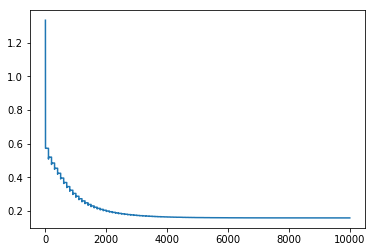

In [16]:
training_x[7][0] = -1
#Our first technique will be dividing alpha after every few iterations
# we will divide alpha by 1.1 after every 100 iterations
alpha = 0.1
w = np.zeros((training_x.shape[1], training_y.shape[1]))
b = np.zeros(training_y.shape[1])
mse_arr = []
error_arr = []
error = 10**10
for iteration in range(10000):
    mse_error = 0.0
    for i, training in enumerate(training_x):
        training = np.expand_dims(training, axis = 0)
        y_pred = calc_Y(training, w, b)
        #Lets calculate error
        t = np.expand_dims(training_y[i], axis = 0)
        error = calc_error(y_pred, t)
        mse_error += error
        #Lets update w and b based on error
        w = w - 2*alpha*training.T.dot(y_pred - t)
        b = b - 2*alpha*(y_pred - t)
    error_arr.append(error)
    mse_arr.append(mse_error/len(training_x))
    if iteration%100 == 0:
        alpha/=1.1
    if iteration%500 == 0:
        print "mse error is:", mse_error/len(training_x)
divide_alpha_fig1 = plt.figure()
sb_divide = divide_alpha_fig1.add_subplot(111)
sb_divide.plot(range(10000), error_arr)
plt.show()

mse error is: 1.55581878685
mse error is: 1.02971568829
mse error is: 0.80659224326
mse error is: 0.702575128553
mse error is: 0.648105704437
mse error is: 0.617544210525
mse error is: 0.599692774883
mse error is: 0.589013664502
mse error is: 0.582532704133
mse error is: 0.578564860032
mse error is: 0.576122441991
mse error is: 0.574613971726
mse error is: 0.573680401727
mse error is: 0.573101899055
mse error is: 0.572743142167
mse error is: 0.572520554068
mse error is: 0.572382410345
mse error is: 0.572296659343
mse error is: 0.57224342449
mse error is: 0.572210373599


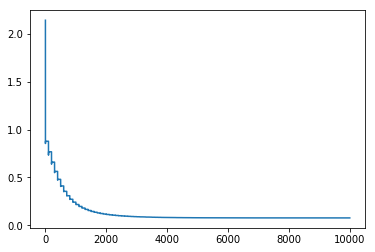

In [22]:
training_x[7][0] = 1

#Our first technique will be dividing alpha after every few iterations
# we will divide alpha by 1.1 after every 100 iterations
alpha = 0.1
w = np.zeros((training_x.shape[1], training_y.shape[1]))
b = np.zeros(training_y.shape[1])
mse_arr = []
error_arr = []
error = 10**10
for iteration in range(10000):
    mse_error = 0.0
    for i, training in enumerate(training_x):
        training = np.expand_dims(training, axis = 0)
        y_pred = calc_Y(training, w, b)
        #Lets calculate error
        t = np.expand_dims(training_y[i], axis = 0)
        error = calc_error(y_pred, t)
        mse_error += error
        #Lets update w and b based on error
        w = w - 2*alpha*training.T.dot(y_pred - t)
        b = b - 2*alpha*(y_pred - t)
    error_arr.append(error)
    mse_arr.append(mse_error/len(training_x))
    if iteration%100 == 0:
        alpha/=1.1
    if iteration%500 == 0:
        print "mse error is:", mse_error/len(training_x)
divide_alpha_fig1 = plt.figure()
sb_divide = divide_alpha_fig1.add_subplot(111)
sb_divide.plot(range(10000), error_arr)
plt.show()

Thus after increasing value from -2 towards 1,
In 10k iterations it is not converging to as lower value of 0.35 as before.